## Machine Learning Algorithm with TensorFlow 2

### Importing relevant Libraries

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Data Generation

In [16]:
# fake data

observation = 1000
a = np.random.uniform(-10,10, size = (observation,1))
b = np.random.uniform(-10,10, size = (observation,1))

gen_inputs = np.column_stack((a,b))
noise = np.random.uniform(-1,1,(observation,1))

gen_targets = 2*a - 3*b + 5 + noise

# The required Deep learning preprocessing 
# we want a format that can store the information in tensors i.e .npz file
np.savez('TF_file', inputs = gen_inputs, targets = gen_targets)


### Defining our Model

In [17]:
# loading our Data
training_data = np.load('TF_file.npz')

In [18]:
input_size = 2
output_size = 1

# we have to build our models unlike other packages where we have built-in models
model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size)
                            ])

# According to our theoritical framework, we need Data, Model, Objective function and Optimization Algorithm
# we have taken care of the data and model

model.compile(optimizer = 'sgd', loss = 'mean_squared_error')

# we have loaded the data 
#outlined the model and 
#configured the learning process by selecting the objective function and the optimization algorithm

# Now we will indicate which data to fit to the model

model.fit(training_data['inputs'], training_data['targets'], epochs = 100, verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 26.2936
Epoch 2/100
32/32 - 0s - loss: 4.5956
Epoch 3/100
32/32 - 0s - loss: 1.4799
Epoch 4/100
32/32 - 0s - loss: 0.6643
Epoch 5/100
32/32 - 0s - loss: 0.4335
Epoch 6/100
32/32 - 0s - loss: 0.3682
Epoch 7/100
32/32 - 0s - loss: 0.3500
Epoch 8/100
32/32 - 0s - loss: 0.3494
Epoch 9/100
32/32 - 0s - loss: 0.3436
Epoch 10/100
32/32 - 0s - loss: 0.3405
Epoch 11/100
32/32 - 0s - loss: 0.3454
Epoch 12/100
32/32 - 0s - loss: 0.3391
Epoch 13/100
32/32 - 0s - loss: 0.3459
Epoch 14/100
32/32 - 0s - loss: 0.3387
Epoch 15/100
32/32 - 0s - loss: 0.3461
Epoch 16/100
32/32 - 0s - loss: 0.3389
Epoch 17/100
32/32 - 0s - loss: 0.3421
Epoch 18/100
32/32 - 0s - loss: 0.3381
Epoch 19/100
32/32 - 0s - loss: 0.3436
Epoch 20/100
32/32 - 0s - loss: 0.3389
Epoch 21/100
32/32 - 0s - loss: 0.3473
Epoch 22/100
32/32 - 0s - loss: 0.3387
Epoch 23/100
32/32 - 0s - loss: 0.3412
Epoch 24/100
32/32 - 0s - loss: 0.3482
Epoch 25/100
32/32 - 0s - loss: 0.3463
Epoch 26/100
32/32 - 0s - loss: 0

### Extract the weight and bias

In [19]:
model.layers[0].get_weights()

[array([[ 1.9991939],
        [-3.0254972]], dtype=float32),
 array([5.018394], dtype=float32)]

In [20]:
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]

In [21]:
weights

array([[ 1.9991939],
       [-3.0254972]], dtype=float32)

In [22]:
bias

array([5.018394], dtype=float32)

### This is a confirmation that our algorithm has indeed learned the underlined relationship

### To predict Values using our model (Extracting the outputs)

In [23]:
model.predict_on_batch(training_data['inputs']).round(1)
# The results are the output values that are compared to the target to evaluate the loss function
# i.e the outputs after 100 epochs of training

array([[ -9.7],
       [ 39.3],
       [ 23.6],
       [-29.2],
       [-20.5],
       [ -4.1],
       [-24.9],
       [-16.8],
       [ 10.9],
       [  4.5],
       [ 21.7],
       [  8.3],
       [ 32.3],
       [ 33.5],
       [ 25.1],
       [ -2. ],
       [ 10.1],
       [ 31.5],
       [  7.8],
       [ 10. ],
       [-10.4],
       [ 24.4],
       [-22.7],
       [  9.7],
       [-34.7],
       [ 34.7],
       [ -7.5],
       [ 25.8],
       [ -2.4],
       [ -8.6],
       [ 27.8],
       [-35.8],
       [-10.9],
       [  5.6],
       [ -1.8],
       [  5.5],
       [ 42.6],
       [-30.5],
       [-23.2],
       [  4.9],
       [  1. ],
       [-28.3],
       [ 24.5],
       [ 13.5],
       [ 30.5],
       [ -1.6],
       [  5.1],
       [ 10.7],
       [-17.9],
       [ 18.6],
       [ 19.9],
       [  2.3],
       [ -7.6],
       [-35.6],
       [ 24. ],
       [ 36.1],
       [ 14.4],
       [ -7.1],
       [ 14.8],
       [ 51.2],
       [ 42.7],
       [ 32.3],
       [

In [24]:
training_data['targets'].round(1)

array([[-10.2],
       [ 39.4],
       [ 22.8],
       [-28.3],
       [-21.3],
       [ -3.9],
       [-24.5],
       [-15.8],
       [ 10.4],
       [  5.5],
       [ 21.7],
       [  7.5],
       [ 31.2],
       [ 33.3],
       [ 24.8],
       [ -2.2],
       [ 10.9],
       [ 32. ],
       [  6.9],
       [ 10.7],
       [-10.6],
       [ 24.5],
       [-21.8],
       [  9.1],
       [-33.6],
       [ 34.4],
       [ -7.2],
       [ 26.3],
       [ -3.4],
       [ -8.6],
       [ 26.9],
       [-35.3],
       [-10.2],
       [  4.8],
       [ -1.6],
       [  5.5],
       [ 42.5],
       [-31. ],
       [-23.9],
       [  5.3],
       [  1.3],
       [-27.4],
       [ 25.1],
       [ 12.8],
       [ 30.9],
       [ -1.1],
       [  5.2],
       [ 11.1],
       [-17.9],
       [ 17.7],
       [ 19.6],
       [  2.8],
       [ -7.3],
       [-35. ],
       [ 23.1],
       [ 36.5],
       [ 15.2],
       [ -6.5],
       [ 15.6],
       [ 51.5],
       [ 42. ],
       [ 32.4],
       [

### The outputs and the targets are very close to each other but are not exactly the same

### Plotting the Data

Text(0, 0.5, 'Targets')

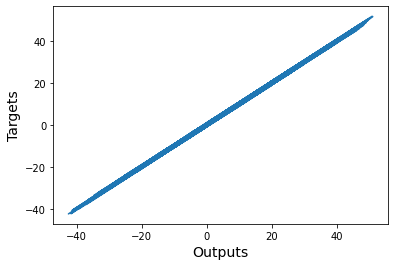

In [26]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('Outputs', size = 14)
plt.ylabel('Targets', fontsize = 14)